In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [37]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [2]:
df = pd.read_csv("training.csv")

In [45]:
print(df.iloc[0])

AGE                               33.0
ALTITUDE                    149.965698
E_W                                  W
HEIGHT                           5'11"
IHC                              Boise
JOB                       Squad Leader
LATITUDE                     44.181013
LOAD                              55.0
LONGITUDE                   115.991606
LONGITUDE_                 -115.991606
N_S                                  N
PARTICIPANT_KEY                    8.0
SEX                                  F
SLOPE                            999.0
SPEED                            999.0
SQUAD                           BOF-7A
TRACK_KEY                         54.0
UP_DOWN                          999.0
UTC_DATE           1999-09-23 00:00:00
UTC_TIME                      20:49:37
VALID                            FIXED
WEIGHT                           170.0
dem_elev                   1145.339966
Name: 0, dtype: object


In [26]:
latitudes = []
longitudes = []
altitudes = []
times = []
slope = []
speed = []
up_down = []
weight = []

for index, row in df.iterrows():
    if row['IHC'] == 'Boise' and row['JOB'] == 'Squad Leader':
        hour = int(row['UTC_TIME'][:2])
        if hour >= 15 and hour <= 18:
            latitudes.append(row['LATITUDE'])
            longitudes.append(row['LONGITUDE'])
            altitudes.append(row['ALTITUDE'])
            times.append(row['UTC_TIME'])

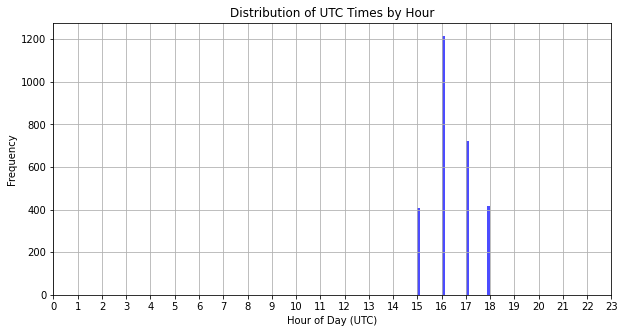

In [28]:
hours = [int(time[:2]) for time in times]

plt.figure(figsize=(10, 5))
plt.hist(hours, bins=24, color='blue', alpha=0.7)
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Frequency')
plt.title('Distribution of UTC Times by Hour')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

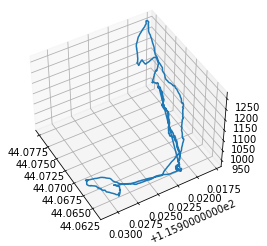

In [44]:
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot points as a line
ax.plot(latitudes, longitudes, altitudes)

ax.view_init(elev=45, azim=150)  # Set elevation and azimuth angles

# Show plot
plt.show()

ValueError: Argument Z must be 2-dimensional.

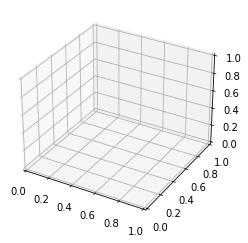

In [40]:
# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot surface

latitudes_np = np.array(latitudes) 
longitudes_np = np.array(longitudes)
altitudes_np = np.array(latitudes) 

ax.plot_surface(latitudes_np, longitudes_np, altitudes_np)

# Function to update plot
def update_plot(elev, azim):
    ax.view_init(elev=elev, azim=azim)
    fig.canvas.draw()

# Create sliders
elev_slider = widgets.FloatSlider(value=30, min=0, max=90, description='Elevation:')
azim_slider = widgets.FloatSlider(value=45, min=0, max=360, description='Azimuth:')

# Display sliders
display(elev_slider)
display(azim_slider)

# Link sliders to update_plot function
widgets.interactive(update_plot, elev=elev_slider, azim=azim_slider)

# Show plot
plt.show()